# Face Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia  = cv2.imread("../imgs/Nadia_Murad.jpg",0)
denis  = cv2.imread("../imgs/Denis_Mukwege.jpg",0)
solvay = cv2.imread("../imgs/solvay_conference.jpg",0)

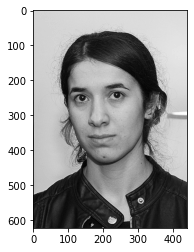

In [4]:
plt.imshow(nadia,cmap="gray")

### Frontal Face

In [5]:
cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")

<CascadeClassifier 000002C867164370>

In [6]:
face_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")

In [54]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    # print(type(face_rects))
    # print(face_rects.shape)
    # print(face_rects)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,255),10)
        
    return face_img

In [27]:
result = detect_face(denis)

[[131 187 515 515]]


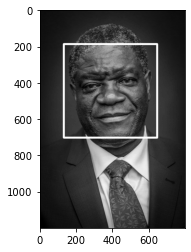

In [28]:
plt.imshow(result,cmap="gray")

In [30]:
result = detect_face(nadia)

[[ 55 141 276 276]]


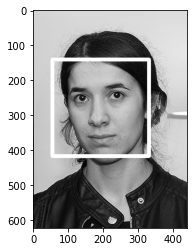

In [31]:
plt.imshow(result,cmap="gray")

In [34]:
result = detect_face(solvay)

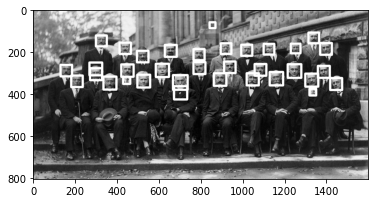

In [36]:
plt.imshow(result,cmap="gray")

In [37]:
def adj_detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    # print(type(face_rects))
    # print(face_rects.shape)
    # print(face_rects)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

In [38]:
result = adj_detect_face(solvay)

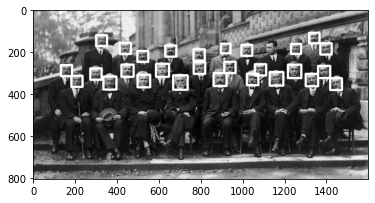

In [39]:
plt.imshow(result,cmap="gray")

### Eyes

In [40]:
eye_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_eye.xml")

In [47]:
def detect_eyes(img):
    
    face_img = img.copy()
    
    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    # print(type(face_rects))
    # print(face_rects.shape)
    # print(face_rects)
    
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

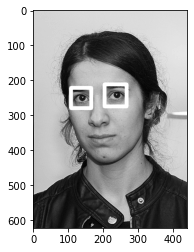

In [48]:
result = detect_eyes(nadia)
plt.imshow(result,cmap="gray")

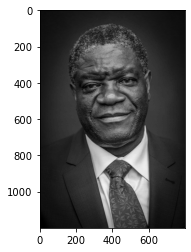

In [49]:
result = detect_eyes(denis)
plt.imshow(result,cmap="gray")

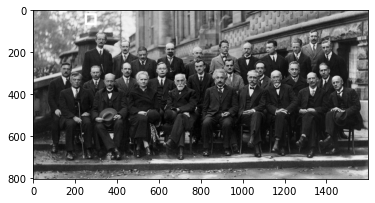

In [50]:
result = detect_eyes(solvay)
plt.imshow(result,cmap="gray")

### Face Detection on Webcam

In [56]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow("Video Face Detect",frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()